<a href="https://colab.research.google.com/github/Abinav160701/ML_Projects/blob/master/CustomerSegmentation_using_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


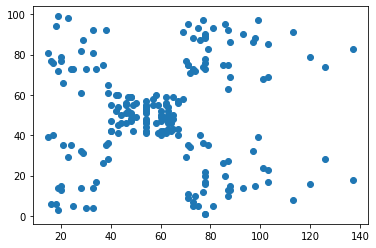

In [4]:
## scatter plot

plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'])

In [5]:
## Scaling 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dataset[['Annual Income (k$)']])
dataset['Annual Income (k$)'] = scaler.transform(dataset[['Annual Income (k$)']])

In [6]:
scaler.fit(dataset[['Spending Score (1-100)']])
dataset['Spending Score (1-100)'] = scaler.transform(dataset[['Spending Score (1-100)']])

In [7]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


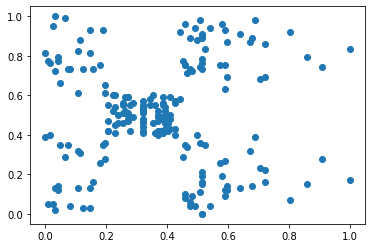

In [8]:
## scatter plot

plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'])

In [9]:
## uisng 3rd and 4th feature only and converting them into numpy array

x = dataset.iloc[:,[3,4]].values

In [12]:
from sklearn.cluster import KMeans
css=[]
for i in range(1,21):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(x)
  css.append(kmeans.inertia_)

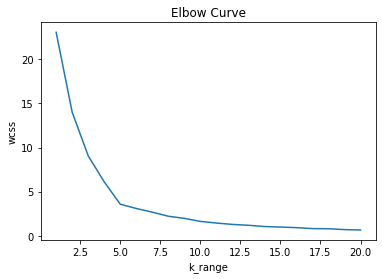

In [13]:
k_range=range(1,21)
plt.plot(k_range,css)
plt.title('Elbow Curve')
plt.xlabel('k_range')
plt.ylabel('wcss')
plt.show()

In [15]:
k_means=KMeans(n_clusters=5)
k_means

KMeans(n_clusters=5)

In [17]:
Label = k_means.fit_predict(x)

In [19]:
dataset['cluster'] = Label

In [20]:
d_1 = dataset[dataset.cluster==0]
d_2 = dataset[dataset.cluster==1]
d_3 = dataset[dataset.cluster==2]
d_4 = dataset[dataset.cluster==3]
d_5 = dataset[dataset.cluster==4]

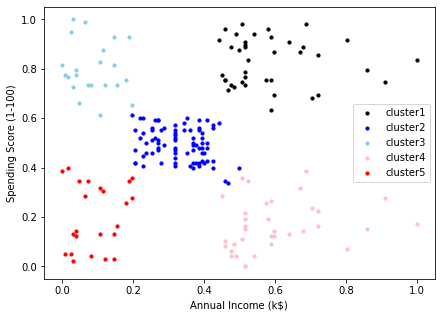

In [21]:
plt.figure(figsize=(7,5))
plt.scatter(d_1['Annual Income (k$)'],d_1['Spending Score (1-100)'],c='black',s=10,label='cluster1')
plt.scatter(d_2['Annual Income (k$)'],d_2['Spending Score (1-100)'],c='blue',s=10,label='cluster2')
plt.scatter(d_3['Annual Income (k$)'],d_3['Spending Score (1-100)'],c='skyblue',s=10,label='cluster3')
plt.scatter(d_4['Annual Income (k$)'],d_4['Spending Score (1-100)'],c='pink',s=10,label='cluster4')
plt.scatter(d_5['Annual Income (k$)'],d_5['Spending Score (1-100)'],c='red',s=10,label='cluster5')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [22]:
k_means.cluster_centers_


array([[0.58638083, 0.82783883],
       [0.33029751, 0.49508692],
       [0.08792846, 0.79962894],
       [0.6       , 0.16443149],
       [0.09265859, 0.20319432]])

In [23]:
k_means.inertia_

3.5831179059525606

In [25]:
print(f"Co-ordinates of Cluseter i :     x           y \n")
for i in range(len(k_means.cluster_centers_)):
    print(f"Co-ordinates of Cluseter {i} : {k_means.cluster_centers_[i]} ")
 

Co-ordinates of Cluseter i :     x           y 

Co-ordinates of Cluseter 0 : [0.58638083 0.82783883] 
Co-ordinates of Cluseter 1 : [0.33029751 0.49508692] 
Co-ordinates of Cluseter 2 : [0.08792846 0.79962894] 
Co-ordinates of Cluseter 3 : [0.6        0.16443149] 
Co-ordinates of Cluseter 4 : [0.09265859 0.20319432] 


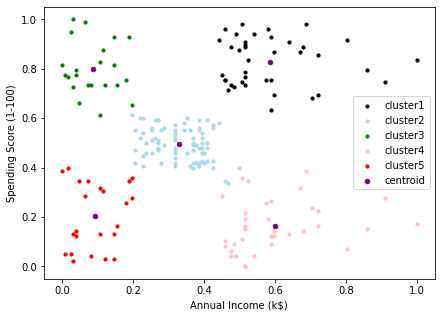

In [26]:
plt.figure(figsize=(7,5))
plt.scatter(d_1['Annual Income (k$)'],d_1['Spending Score (1-100)'],c='black',s=10,label='cluster1')
plt.scatter(d_2['Annual Income (k$)'],d_2['Spending Score (1-100)'],c='lightblue',s=10,label='cluster2')
plt.scatter(d_3['Annual Income (k$)'],d_3['Spending Score (1-100)'],c='green',s=10,label='cluster3')
plt.scatter(d_4['Annual Income (k$)'],d_4['Spending Score (1-100)'],c='pink',s=10,label='cluster4')
plt.scatter(d_5['Annual Income (k$)'],d_5['Spending Score (1-100)'],c='red',s=10,label='cluster5')

plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],c='purple',s=20,label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()